In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from matplotlib.colors import ListedColormap

In [3]:
file_path = Path(r'../data/01_raw/DataCompetencySurvey.xlsx')
df = pd.read_excel(file_path)
df = pd.DataFrame(df)

In [4]:
new_column_names = {
    'Programming: R': 'R',
    'Programming: Python': 'Python',
    'Programming: Bash': 'Bash',
    'Version Control: GIT': 'GIT',
    'CLI: (np. Bash, PowerShell, CMD)': 'CLI',
    'Front End: (HTML, JavaScript, CSS)': 'FrontEnd',
    'Containers: Docker': 'Docker',
    'Area: Time Series': 'TimeSeries',
    'Area: Classical ML (Clustering, Regression, Classification)': 'ClassicalML',
    'Area: NLP': 'NLP',
    'Area: Computer Vision': 'ComputerVision',
    'Databases: SQL': 'SQL',
    'Databases: NoSQL': 'NoSQL',
    'Cloud: Azure': 'Azure',
    'Cloud: AWS': 'AWS',
    'Cloud: GPC': 'GPC',
    'BI: PowerBI': 'PowerBI',
    'BI: Tableau': 'Tableau',
    'Project Management': 'ProjectManagement',
    'Promocja w Social Media': 'SocialMedia',
    'Ux/Ui': 'UxUi',
    'Projektowanie graficzne': 'GraphicDesign',
    'Nawiązywanie Relacji z Biznesem': 'BusinessRelations',
    'Nawiązywanie Relacji z naukowcami': 'ScientistRelations',
    'Pozyskiwanie finansowania': 'Funding',
    'Współpraca z administracją UEW': 'UEWAdmin',
    'FinTech': 'FinTech',
    'HealthTech': 'HealthTech',
    'FashionTech': 'FashionTech',
    'E-commerce': 'Ecommerce',
    'SportTech': 'SportTech',
    'Non-profit': 'NonProfit',
    'PropTech (nieruchomości)': 'PropTech',
    'Cybersecurity': 'Cybersecurity',
    'HR': 'HR'
}
df.rename(columns=new_column_names, inplace=True)

In [5]:
print(df.isna().sum())

ID                                                                                                      0
Godzina rozpoczęcia                                                                                     0
Godzina ukończenia                                                                                      0
Adres e-mail                                                                                            0
Nazwa                                                                                                  67
Czas ostatniej modyfikacji                                                                             67
Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.    48
W jaki sposób chcesz uczestniczyć w Community?                                                          0
R                                                                                                       8
Python                                        

In [6]:
df['W jaki sposób chcesz uczestniczyć w Community?'].value_counts()
filtered_df1 = df[df['W jaki sposób chcesz uczestniczyć w Community?'] == 'Póki co chcę czerpać, obserwować, "konsumować content"']

filtered_df = df.drop(filtered_df1.index)
filtered_df.isna().sum()

ID                                                                                                      0
Godzina rozpoczęcia                                                                                     0
Godzina ukończenia                                                                                      0
Adres e-mail                                                                                            0
Nazwa                                                                                                  60
Czas ostatniej modyfikacji                                                                             60
Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.    42
W jaki sposób chcesz uczestniczyć w Community?                                                          0
R                                                                                                       1
Python                                        

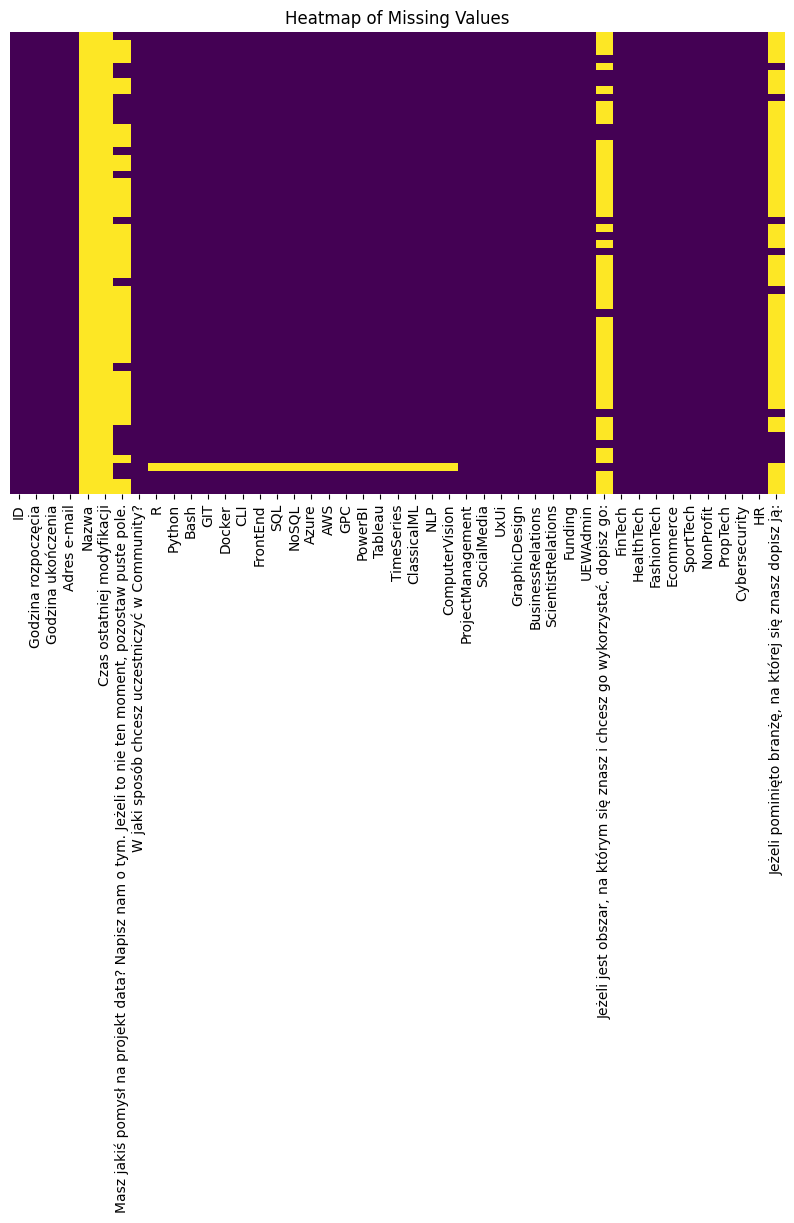

In [7]:
missing_values = filtered_df.isnull()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cmap='viridis', cbar=False, yticklabels=False)

plt.title('Heatmap of Missing Values')
plt.show()

# HEATMAPY
 
### Wydaje mi się że któraś z heatmap na dole jest lepsza ale dajcie znać co wam najbardziej odpowiada (albo modyfikujcie...jak chcecie)


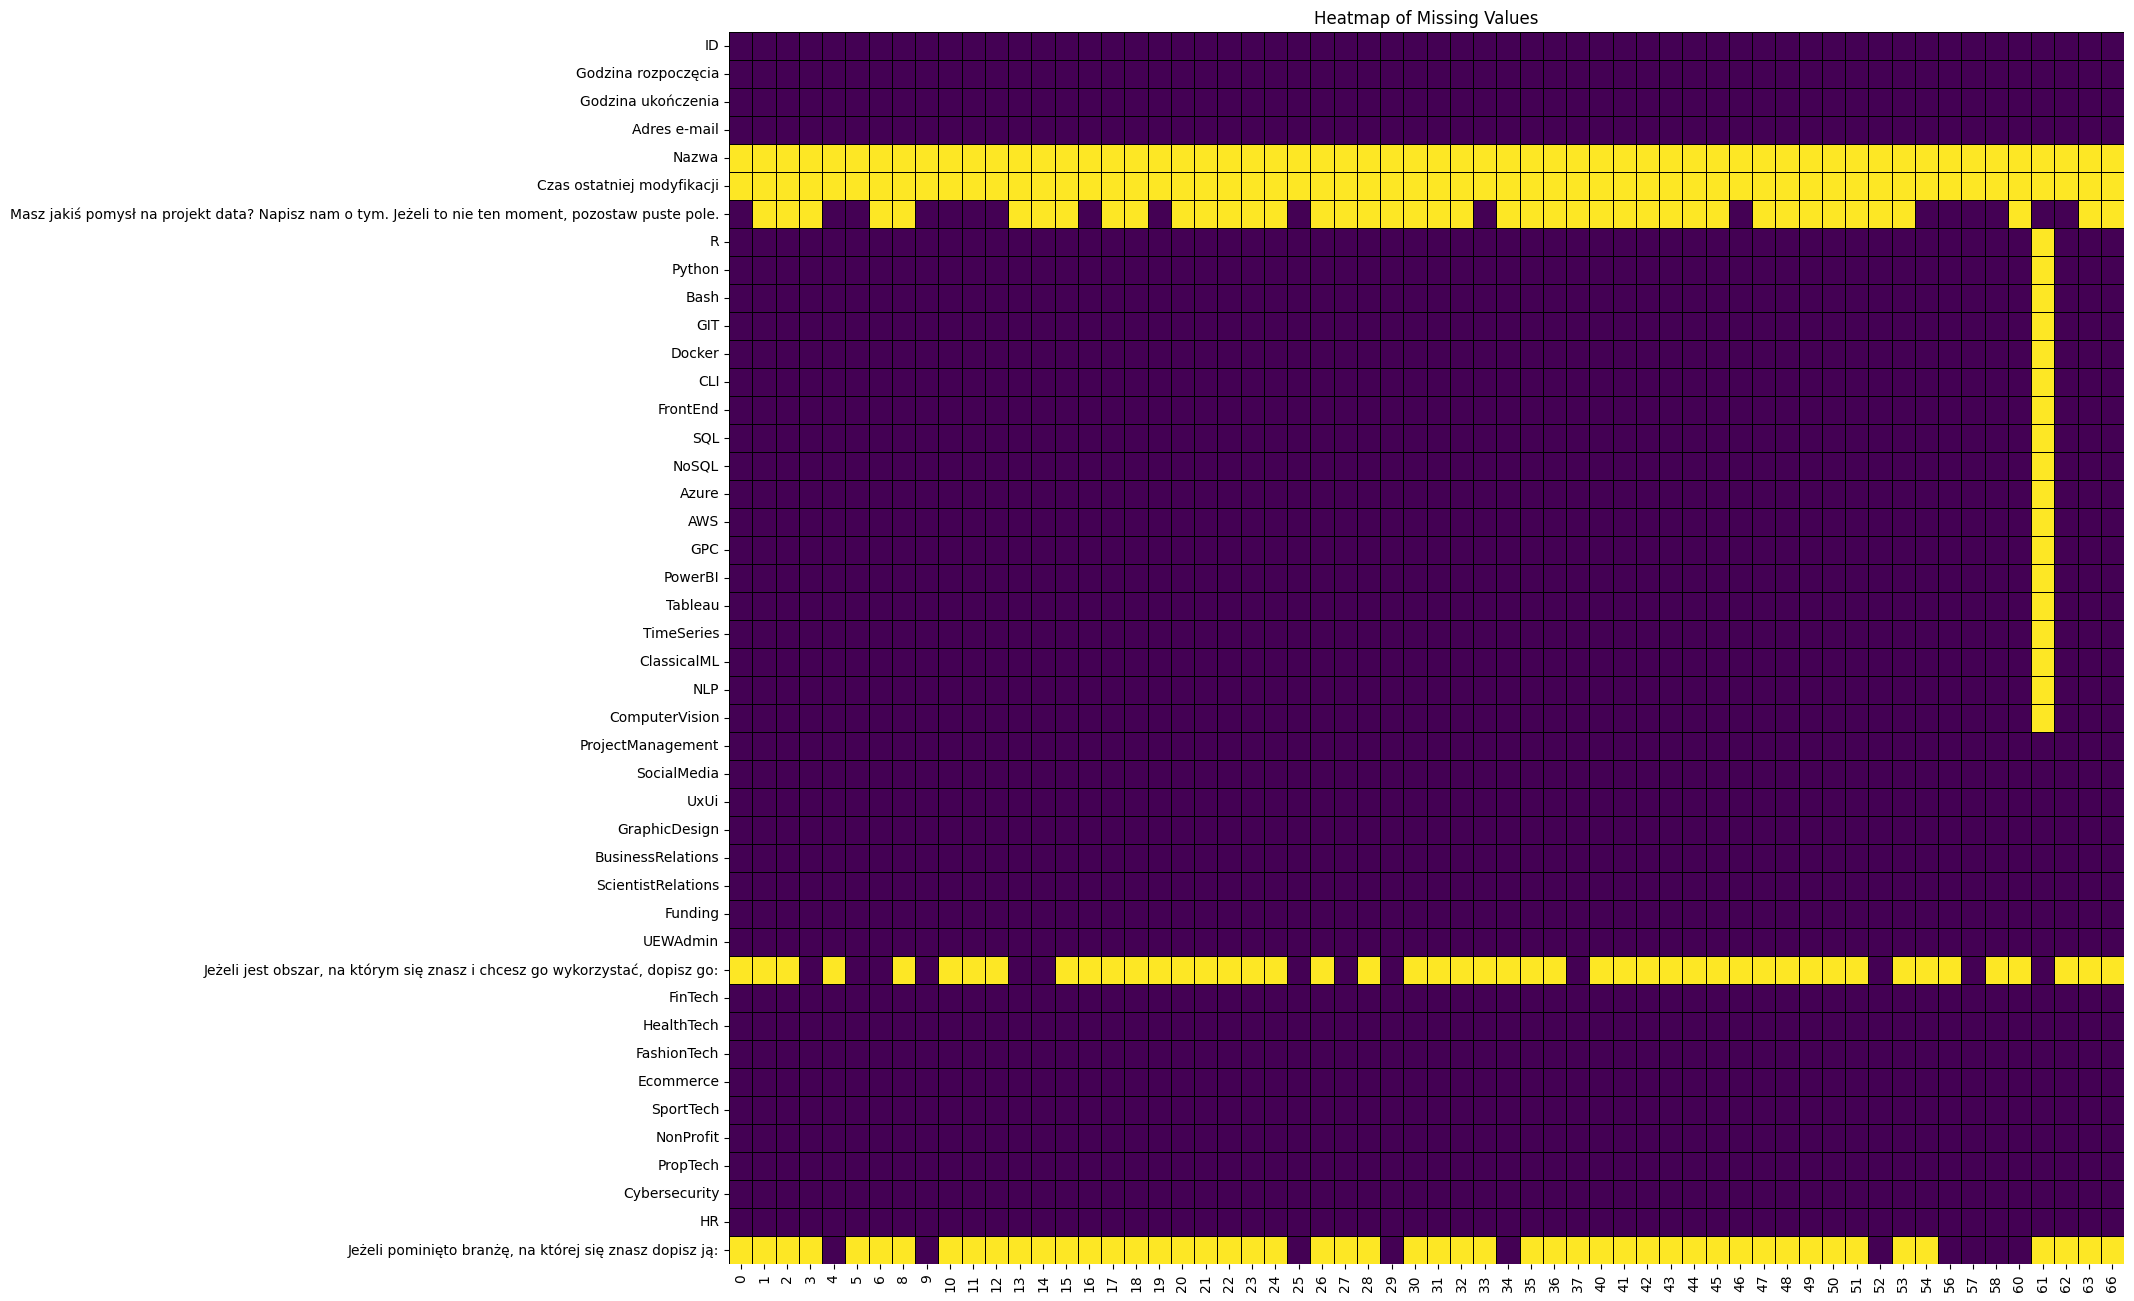

In [40]:

# Find missing values
q = filtered_df.isnull()

# Transpose the missing values DataFrame
transposed_missing_values = q.T

# Drop the specific column if it exists
column_to_drop = 'W jaki sposób chcesz uczestniczyć w Community?'
if column_to_drop in transposed_missing_values.index:
    transposed_missing_values = transposed_missing_values.drop(column_to_drop)

# Plotting the heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(transposed_missing_values, cmap='viridis', cbar=False, yticklabels=True, xticklabels=True, linewidths=0.5, linecolor='black')

# Set the ticks and labels
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Heatmap of Missing Values')

plt.show()


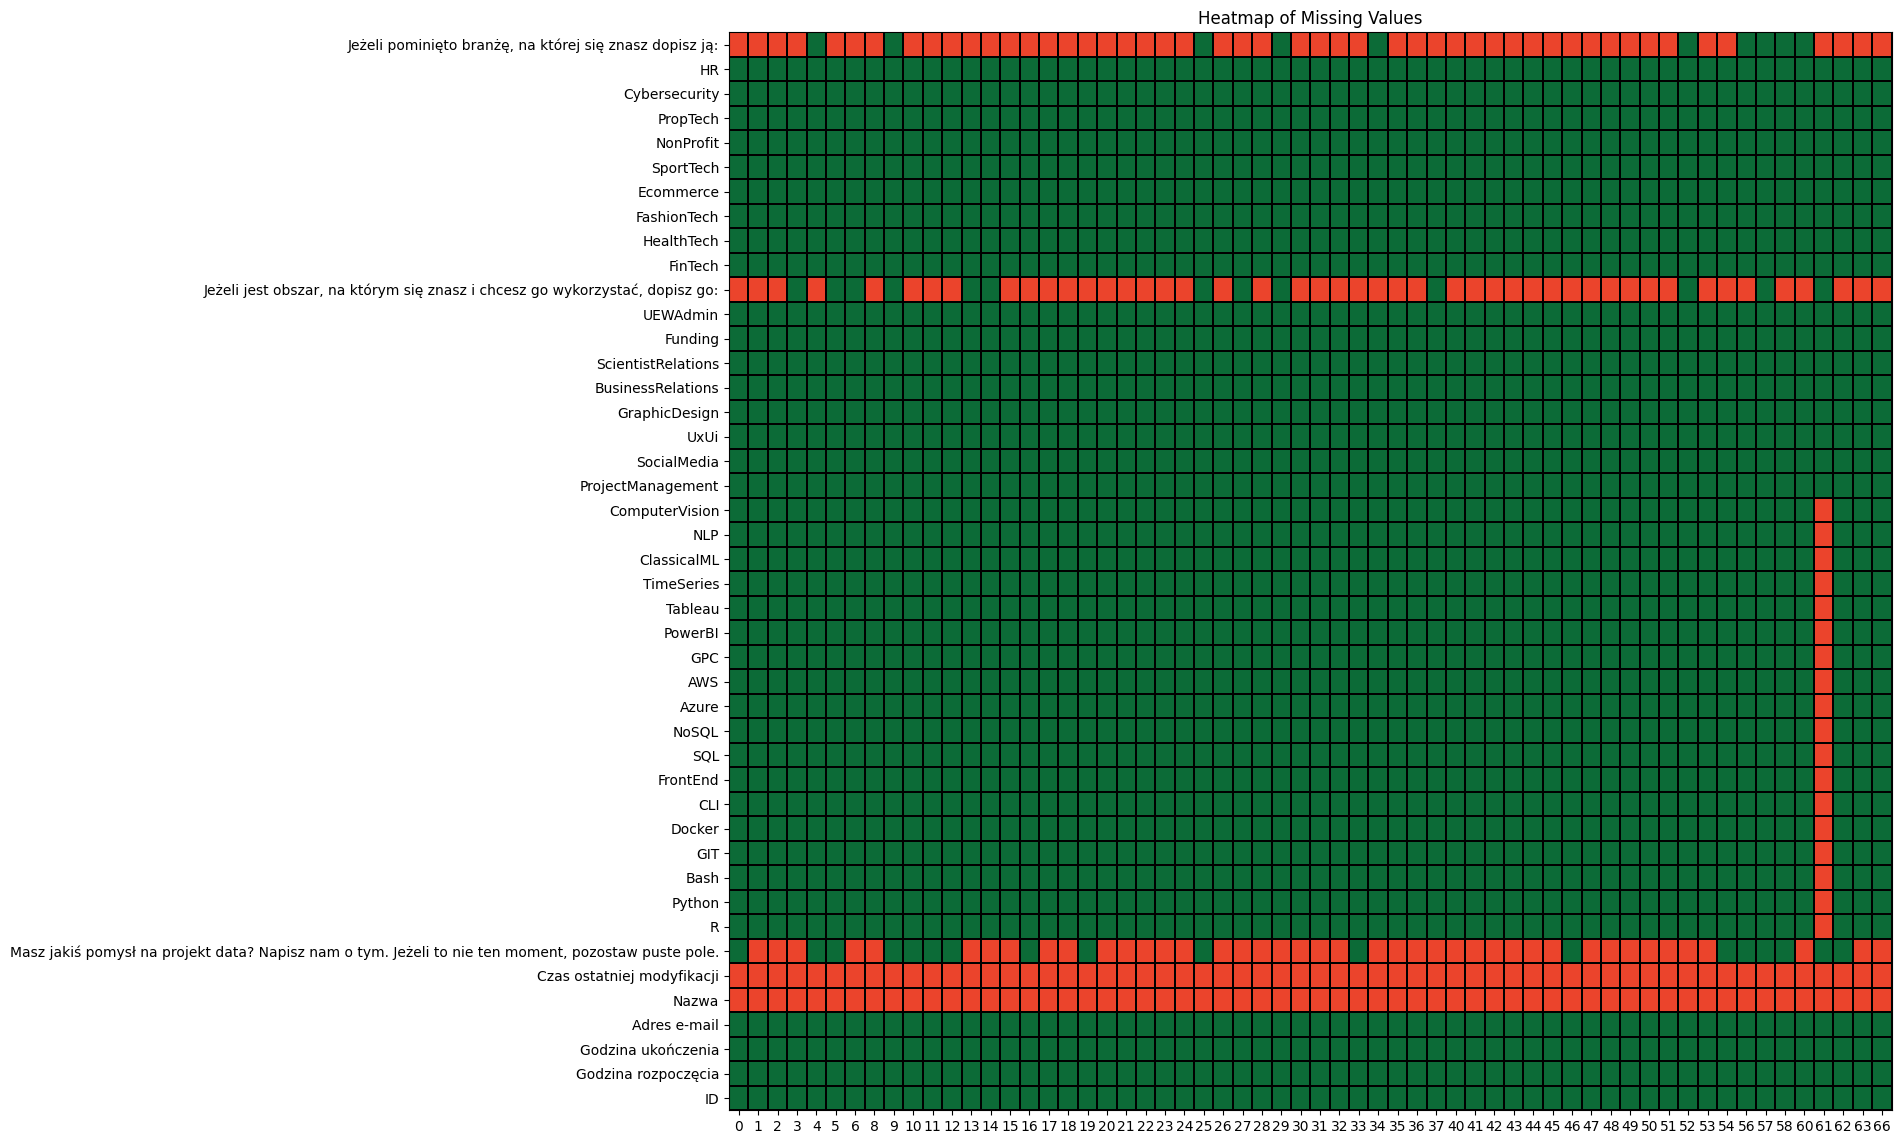

In [54]:
# Plot the heatmap using pcolormesh

# Find missing values
q = filtered_df.isnull()

# Transpose the missing values DataFrame
q = q.T




q.rename(columns={'Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.':'Projekt Data? Masz - pisz Nie masz - zostaw puste pole'}, inplace=True)

# Drop the specific column if it exists
column_to_drop = 'W jaki sposób chcesz uczestniczyć w Community?'
if column_to_drop in q.index:
    q = q.drop(column_to_drop)

colors = ['#0C6B37', '#EB442C']  



# Create custom colormap
cmap = ListedColormap(colors)


plt.figure(figsize=(15, 14))
ax = plt.gca()
cax = ax.pcolormesh(q, cmap=cmap, edgecolors='k', linewidth=0.01)

# Set the ticks and labels
ax.set_xticks(np.arange(q.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(q.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(q.columns, rotation=0)
ax.set_yticklabels(q.index)

plt.title('Heatmap of Missing Values')


plt.show()


In [8]:
df2 = filtered_df.drop(['Godzina rozpoczęcia', 'Godzina ukończenia', 'Czas ostatniej modyfikacji'], axis=1)

df2.head()
df2.isna().sum()
record = df2.loc[df2['R'].isna()] # Record with missing values
record.index

Index([61], dtype='int64')

In [9]:
print(record) # Record with missing values

    ID Adres e-mail  Nazwa  \
61  62    anonymous    NaN   

   Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.  \
61  Swarm wirtualnych asystentów do pisania kodu w...                                                    

   W jaki sposób chcesz uczestniczyć w Community?   R  Python  Bash  GIT  \
61             Chcę organizować "życie" Community NaN     NaN   NaN  NaN   

    Docker  ...  FinTech  HealthTech  FashionTech  Ecommerce  SportTech  \
61     NaN  ...      3.0         3.0          1.0        2.0        1.0   

    NonProfit  PropTech  Cybersecurity   HR  \
61        1.0       0.0            3.0  1.0   

    Jeżeli pominięto branżę, na której się znasz dopisz ją:  
61                                                NaN        

[1 rows x 42 columns]


In [10]:
df_filtered2 = df2.drop(index=df2[df2.index == 61].index)
df_filtered2.isna().sum()

ID                                                                                                      0
Adres e-mail                                                                                            0
Nazwa                                                                                                  59
Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.    42
W jaki sposób chcesz uczestniczyć w Community?                                                          0
R                                                                                                       0
Python                                                                                                  0
Bash                                                                                                    0
GIT                                                                                                     0
Docker                                        

In [11]:
new_file_path = Path(r'../data/03_processed/01_preprocessed.csv')
df_filtered2.to_csv(new_file_path, index=False)

In [12]:
ideas = df_filtered2['Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.'].dropna().values
for idea in ideas:
    print(idea)
    print(' ')

Projekt "data" będący mobilną stacją benzynową, umożliwiającą zdalne tankowanie na bezobsługowych stacjach i organizację miesięcznych kosztów zużycia paliwa.
 
Wirtualni doradcy wpływający na pozytywną zmianę w zachowaniu konsumenta. Np zwiększenie skłonności do oszczędzania i planowania finansowego.
 
modelowanie ryzyka kredytowego 
 
Analiza ruchu drogowego we Wrocławiu na podstawie nagrań z kamer - pozyskanych samodzielnie lub od Gminy Wrocław
 
Pomysłu na projekt nie posiadam w tym momencie ale wydaję mi się, że można by było rozpowszechnić informacje na temat github student developer pack https://education.github.com/students, a także aby jeden ze studentów aplikował na campus experta (następna aplikacja w sierpniu) w całej Polsce jest tylko dwóch jeden na PWr prowadzi PWrski (https://wmsdev.pl/) a drugi na WAT
 
Stworzyć projekt związany z blockchainem Flare który dostarcza dane na temat innych blockchainów i internetu. Dodatkowo ten projekt ma uruchomiony program grantów. Tutaj 

In [13]:
# Drop specific columns from the DataFrame
columns_to_drop = [
    'Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.', 
    'Jeżeli pominięto branżę, na której się znasz dopisz ją:',
    'Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:'
]

# Remove the specified columns
df_filtered2 = df_filtered2.drop(columns=columns_to_drop, axis=1)

df_filtered2.head()

,ID,Adres e-mail,Nazwa,W jaki sposób chcesz uczestniczyć w Community?,R,Python,Bash,GIT,Docker,CLI,...,UEWAdmin,FinTech,HealthTech,FashionTech,Ecommerce,SportTech,NonProfit,PropTech,Cybersecurity,HR
0,1,anonymous,NaN,Chcę uczestniczyć w projekcie data i organizow...,2.0,3.0,3.0,4.0,3.0,4.0,...,2.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0
1,2,anonymous,NaN,Chcę uczestniczyć w projekcie data,3.0,3.0,1.0,3.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3,anonymous,NaN,Chcę uczestniczyć w projekcie data,0.0,1.0,0.0,1.0,0.0,0.0,...,2.0,3.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0
3,4,anonymous,NaN,Chcę uczestniczyć w projekcie data i organizow...,3.0,3.0,2.0,2.0,2.0,2.0,...,3.0,3.0,2.0,2.0,3.0,1.0,3.0,1.0,2.0,1.0
4,5,anonymous,NaN,Chcę uczestniczyć w projekcie data i organizow...,3.0,3.0,2.0,2.0,2.0,2.0,...,3.0,3.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0


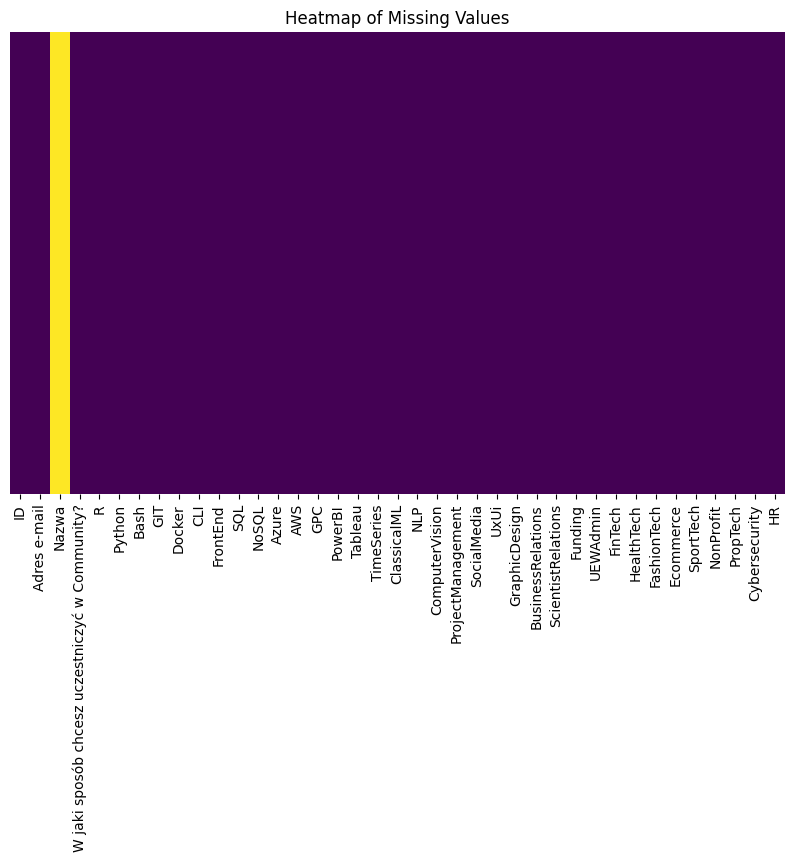

In [14]:
missing_values = df_filtered2.isnull()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cmap='viridis', cbar=False, yticklabels=False)

plt.title('Heatmap of Missing Values')
plt.show()

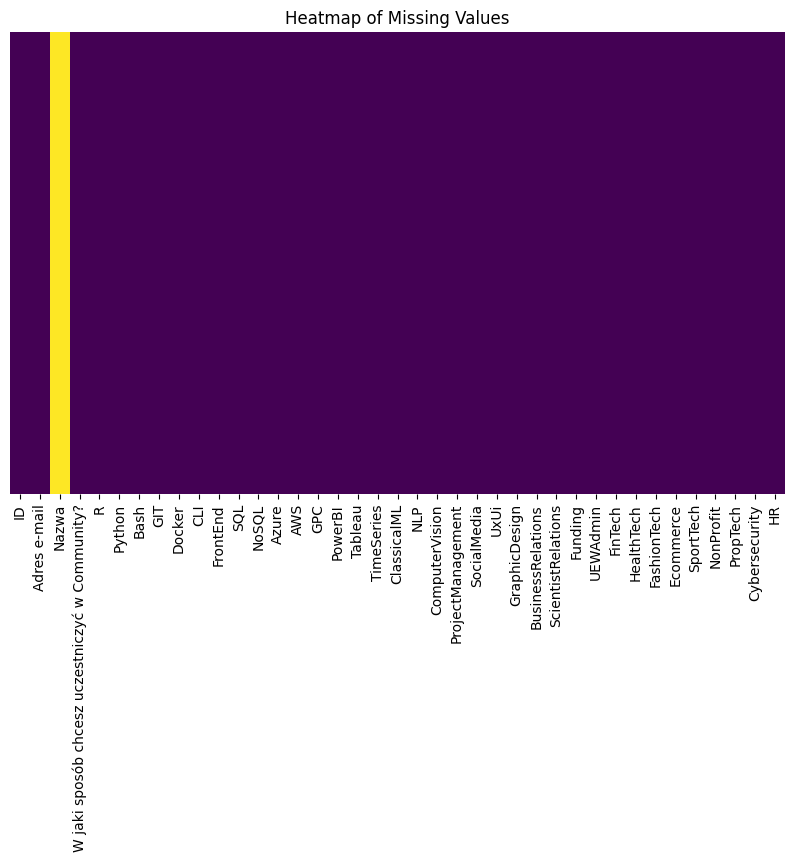

In [15]:
missing_values = df_filtered2.isnull()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cmap='viridis', cbar=False, yticklabels=False)

plt.title('Heatmap of Missing Values')
plt.show()

### ZMIANY

## Moim zdaniem ta heatmapa better ale jak wolicie (Tylko kolumne 'Nazwa' ustawić na samej górze ale poki co nie mam weny na robienie tego 

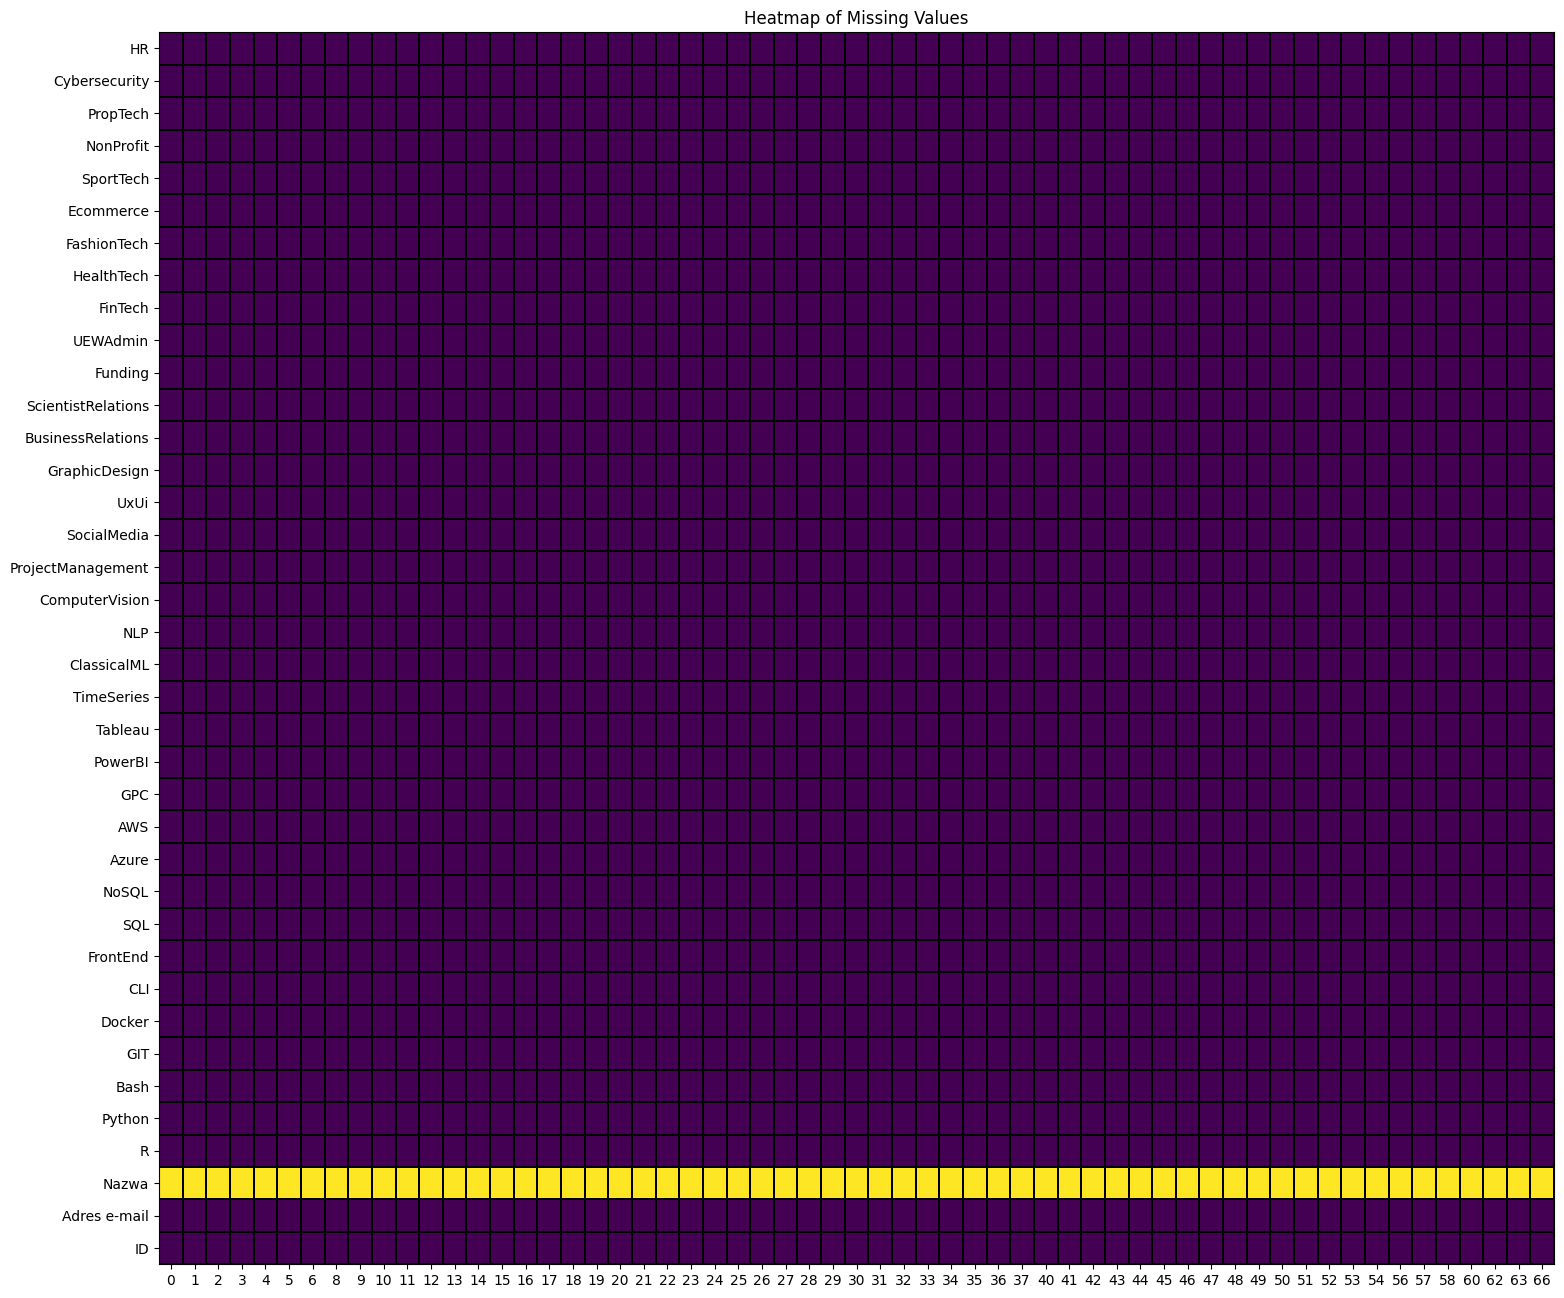

In [34]:

missing_values = df_filtered2.isnull()

# Transpose the missing values DataFrame
transposed_missing_values = missing_values.T
transposed_missing_values = transposed_missing_values.drop('W jaki sposób chcesz uczestniczyć w Community?')


# Plot the heatmap using pcolormesh
plt.figure(figsize=(18, 16))
ax = plt.gca()
cax = ax.pcolormesh(transposed_missing_values, cmap='viridis', edgecolors='k', linewidth=0.01)

# Set the ticks and labels
ax.set_xticks(np.arange(transposed_missing_values.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(transposed_missing_values.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(transposed_missing_values.columns, rotation=0)
ax.set_yticklabels(transposed_missing_values.index)

plt.title('Heatmap of Missing Values')


plt.show()


In [17]:
encoder = LabelEncoder()
df_filtered2['W jaki sposób chcesz uczestniczyć w Community?'] = df_filtered2['W jaki sposób chcesz uczestniczyć w Community?'].astype('category')
df_filtered2['W jaki sposób chcesz uczestniczyć w Community?'] = df_filtered2['W jaki sposób chcesz uczestniczyć w Community?'].cat.codes
df_filtered2['W jaki sposób chcesz uczestniczyć w Community?'].value_counts()

W jaki sposób chcesz uczestniczyć w Community?
0    35
1    24
Name: count, dtype: int64

In [18]:
new_file_path2 = Path(r'../data/03_processed/01_ready_data.csv')
df_filtered2.to_csv(new_file_path2, index=False)